In [2]:
""" importing all the library so that in future it """
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import datasets

In [3]:
""" KNN( K-Nearest Neighbors ): It is a supervised machine learning algorithm used for classification and regression,
 where predictions are made based on the majority class (or average) of the k nearest data points in the feature space.
 """

' KNN( K-Nearest Neighbors ): It is a supervised machine learning algorithm used for classification and regression,\n where predictions are made based on the majority class (or average) of the k nearest data points in the feature space.\n '

['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


Accuracy is : 65%
After the Standard scaler Accuracy is : 98%


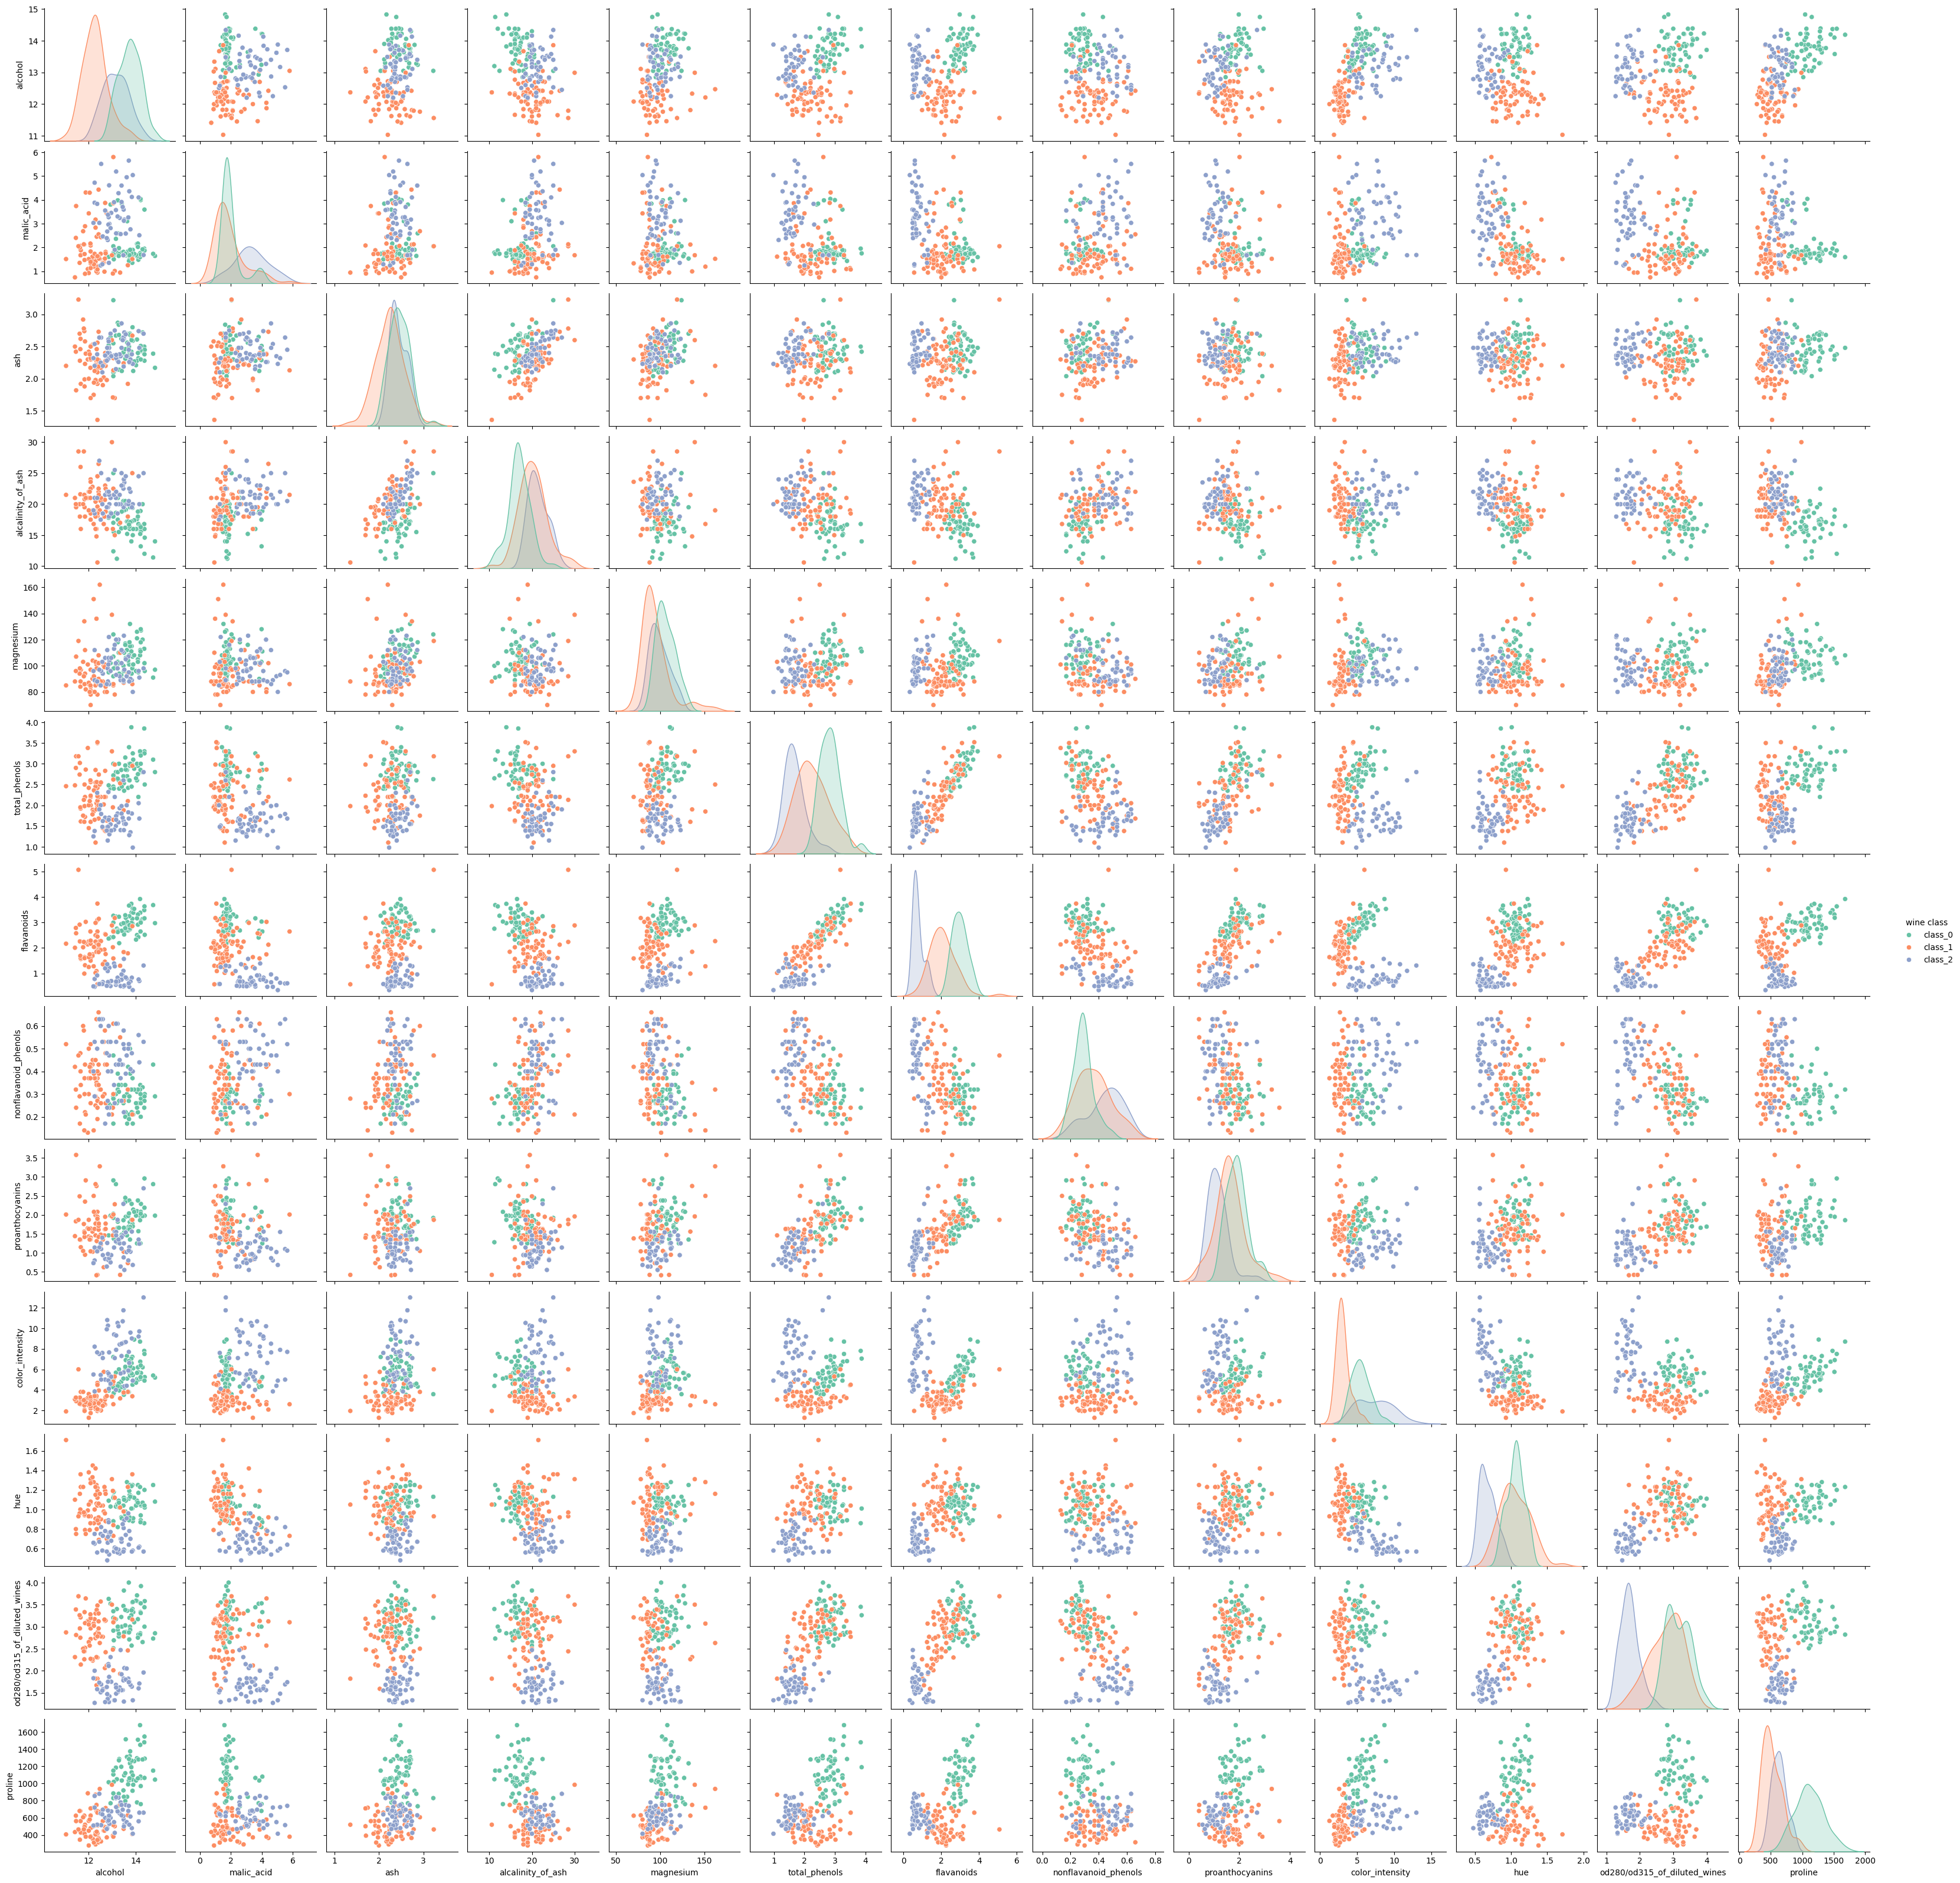

In [20]:
data=datasets.load_wine(as_frame=True)
# data.describe()  describe works only on data frame here it is bunch of object like dict
x=data.data # gets data frames
y=data.target # gets target value
names=data.target_names
print(names)
df=pd.DataFrame(x,columns=data.feature_names) 
df['wine class']=data.target # setting a column name 
df['wine class']=df['wine class'].replace(to_replace=[0,1,2],value=['class_0','class_1','class_2']) # replacing the column name with class_0 etc
display(df)

sns.pairplot(data=df,hue='wine class',palette='Set2')
from sklearn.model_selection import train_test_split # impoting function to split the data and train ,test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1) # test size=.3 means training =70% and testing 30 %
from sklearn.neighbors import KNeighborsClassifier # impoting knn classifier 
import math
math.sqrt(len(y_test))
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train) # training the knn model 
pred=knn.predict(x_test)
from sklearn import metrics # to compare the labels with true labels 
metrics.accuracy_score(y_test,pred)
acc_prt=round((metrics.accuracy_score(y_test,pred))*100)
print(f"Accuracy is : {acc_prt}%")
# Accuracy is 65 % which is quit less so we will train our data to standard scaler for better accuracy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # instance
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
knn1=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
knn1.fit(x_train,y_train)
pred2=knn1.predict(x_test)
acc_prt2=metrics.accuracy_score(y_test,pred2)
acc_prt2=round((metrics.accuracy_score(y_test,pred2))*100)
print(f"After the Standard scaler Accuracy is : {acc_prt2}%")